<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day1/Day1_Teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: Introduction to Machine Learning
## Module Outline:
- M4: *Demo*: Ice-Breaker Data Visualization
- M5: *Demo*: Manipulating Data with Numpy
- M6: *Demo*: Sample Mean and Variance
- M7: *Lab*: Generating a Sine Wave
- M10: *Lab*: Generating a Noisy Sine Wave


# M4: *Demo*: Ice-Breaker Data Visualization
After checking out[ the data](https://docs.google.com/spreadsheets/d/18UkL5ydpiZBtAHllD5MqqnEp0alwuXOgl9GYYM3_A7E/edit?usp=sharing) in a spreadsheets, download it as a CSV file.

In [0]:
from google.colab import files # module for uploading code
uploaded = files.upload() # prompts to upload local file
filename = list(uploaded.keys())[0] # gets uploaded filename

Saving icebreaker.csv to icebreaker.csv
icebreaker.csv


In [0]:
import pandas as pd # module for dealing with datasets
import numpy as np # module for manipulating data

df = pd.read_csv(filename) 
df.head(5) # print first 5 entries

,Name,Prefered Name,Grade,Country,Wake Up Time,Travel Time (mins),Mode of transportation
0,Nikola,Nikola,17,Hong Kong,8.5,20,Train
1,Student's T,Distribution,25,England,1937.0,50,Concord
2,Akshaj,Akshaj,19,India,6.5,25,Train


We'll just take the names and travel time from the dataset for now.

In [0]:
names = df['Name'].values
travel_times = df['Travel Time (mins)'].values

## Plotting the data as a histogram with Matplotlib

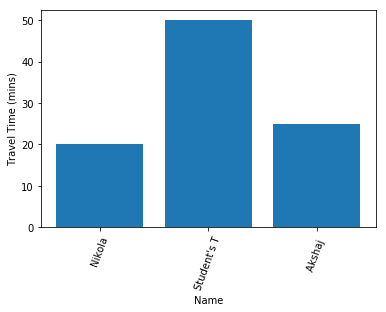

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(names, travel_times)
plt.xticks(names, rotation=70)
plt.xlabel('Name')
plt.ylabel('Travel Time (mins)');

Let's see how many people took what mode of transport.

['Concord' 'Train'] [1 2]


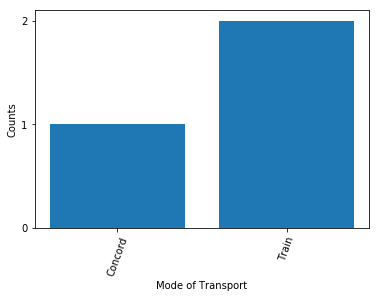

In [0]:
transport = df['Mode of transportation'].values
# counting up the occurrences of unique modes of transport
unique, counts = np.unique(transport, return_counts=True)
print(unique,counts)

plt.bar(unique, counts)
plt.xticks(unique, rotation=70)
plt.xlabel('Mode of Transport')
plt.ylabel('Counts')
plt.yticks(np.arange(np.max(counts)+1));

And how about a plot of the travel time vs. wakeup time

Text(0, 0.5, 'Wake Up Time (hr)')

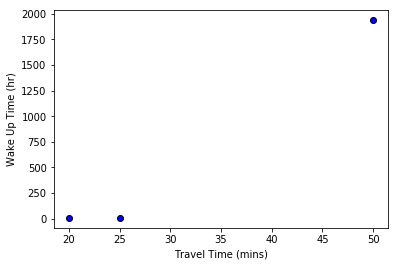

In [0]:
wakeup_times = df['Wake Up Time'].values

plt.plot(travel_times, wakeup_times, 'ob', markeredgecolor='black')
plt.xlabel('Travel Time (mins)')
plt.ylabel('Wake Up Time (hr)');

# M5: *Demo*: Manipulating Data with Numpy
Vectors and matrices in numpy

In [0]:
import numpy as np

v = np.array([1,5,2,9])
u = np.array([3,6,0,-5])

A = np.array([[1,9],[5,11]])
B = np.array([[2,12,4],[3,7,5]])

print("row vectors u,v:",u,v)
print("shape of u:", u.shape)
print("2x2 Matrix A:")
print(A)
print("shape of A:", A.shape)
print("2x3 Matrix B:")
print(B)

row vectors u,v: [ 3  6  0 -5] [1 5 2 9]
shape of u: (4,)
2x2 Matrix A:
[[ 1  9]
 [ 5 11]]
shape of A: (2, 2)
2x3 Matrix B:
[[ 2 12  4]
 [ 3  7  5]]


## Vector Operations

In [0]:
a = 3
w = a*u+2*v # [9, 18, 0, -15] + [2, 10, 4, 9]

lw = np.sqrt(np.dot(w,w))

print("w:",w)
print("length of w: %.2f" % lw)
print("norm of w: %.2f" % np.linalg.norm(w))

w: [11 28  4  3]
length of w: 30.50
norm of w: 30.50


## Matrix Operations

In [0]:
C = np.matmul(A,B)
print(C.shape)
z = np.array([1,2,1])
print(z.shape)

res = np.matmul(C,z)
print(res, res.shape)

# make the result into a column vector
res = res.reshape(-1,1) # -1 means value is infered
print(res, res.shape)

(2, 3)
(3,)
[228 392] (2,)
[[228]
 [392]] (2, 1)


# M6: *Demo*: Sample Mean and Variance
We'll calculate the sample mean and variance of student travel times
## First, using Python and loops

In [0]:
x = travel_times # travel times vector

avg = 0;
for i in range(len(x)):
  avg = avg + x[i]
avg = avg/len(x)

var = 0;
for i in range(len(x)):
  var = var + (x[i]-avg)**2
var = var/(len(x)-1)

def print_func(avg,var):
  print("mean: %.2f" % avg)
  print("variance: %.2f" % var)
  
print_func(avg,var)

mean: 31.67
variance: 258.33


## Now using Numpy 

In [0]:
avg = np.mean(x)
var = np.var(x)

print_func(avg,var)

mean: 31.67
variance: 172.22


## Stats on our Data
Now, looking back at our icebreaker data. What was the mean wakeup time? How far did people deviate from the mean?

Mean = 650.67, Variance = 827327.39


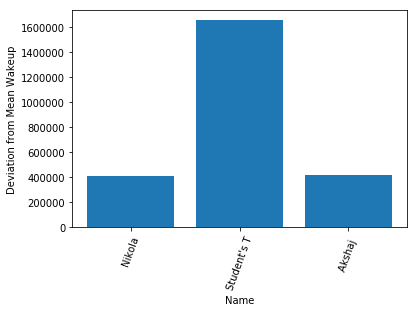

In [0]:
mean_wakeup = np.mean(wakeup_times)
var_wakeup = np.var(wakeup_times)

print("Mean = %.2f, Variance = %.2f" % (mean_wakeup, var_wakeup))

dev = (wakeup_times - mean_wakeup)**2

plt.bar(names, dev)
plt.xticks(names, rotation=70)
plt.xlabel('Name')
plt.ylabel('Deviation from Mean Wakeup');

# M7: *Lab*: Generating a Sine Wave
- Use numpy to generate a sine wave, y=f(x), on the interval [-pi,pi]. 
- Plot the graph using matplotlib
- *Hint*: look into ```np.pi```, ```np.sin()``` and ```np.linspace()``` (ie. google for the documentation of these functions)

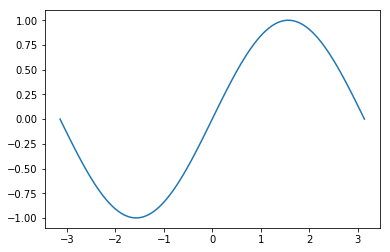

In [0]:
# TODO:

x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)

plt.plot(x,y);

 # M10: *Lab*: Generating a Noisy Sine Wave
- Generate 100 samples of a noisy sine wave
- Plot the noisy measurements on top of the original sine wave
- Hint: look into ```np.random.randn()```



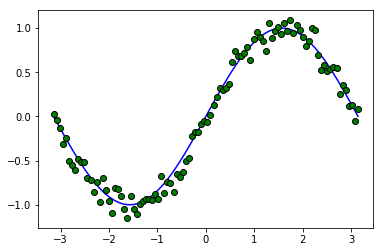

In [0]:
# TODO:

var = 0.01*np.max(y)
y_noisy = y + np.random.normal(0, np.sqrt(var), size=y.shape)

plt.plot(x, y, '-b', x, y_noisy, 'og', markeredgecolor='black');

## Mean and Variance
- What is the mean and variance of your noise?
- What is the mean and variance of your sine wave?

Compute the answers in code. Talk with your neighbors about why this is the case.


In [0]:
# TODO:
mu = np.mean(y_noisy)
v  = np.var(y_noisy)

print_func(mu,v)

mean: -0.02
variance: 0.52
